# Fit the LBA on individual data

In [1]:
import pandas as pd

from rlssm.utility.load_data import load_example_dataset
from rlssm.model.models_LBA import LBAModel_2A

## Import individual data

In [2]:
# import some example data:
data = load_example_dataset(hierarchical_levels = 1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,11,1,1,59,44,4,3,1,1.462756,1
1,11,1,2,53,44,4,2,1,1.256185,0
2,11,1,3,64,55,4,3,2,1.264878,1
3,11,1,4,47,36,3,1,2,1.399706,0
4,11,1,5,54,55,4,3,4,1.381221,1


## Initialize the model

In [3]:
model = LBAModel_2A(hierarchical_levels = 1)

15:10:04 - cmdstanpy - INFO - compiling stan file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A.stan to exe file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A
15:10:11 - cmdstanpy - INFO - compiled model executable: /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A
15:10:11 - cmdstanpy - WARNING - Stan compiler has produced 8 warnings:
15:10:11 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A.hpp /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A.stan
Warning in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/LBA_2A/LBA_2A.stan', line 92, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/hom

## Fit

In [4]:
# sampling parameters
n_warmup = 500
n_sampling = 500
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

15:10:11 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
k_priors {'mu': 1, 'sd': 1}
sp_trial_var_priors {'mu': 0.3, 'sd': 1}
ndt_priors {'mu': 0, 'sd': 1}
drift_variability_priors {'mu': 1, 'sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:10:22 - cmdstanpy - INFO - CmdStan done processing.



Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 200 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 200 iterations ended with a divergence (0.0%)


### Get rhat

In [6]:
model_fit.rhat

,rhat,variable
name,,
lp__,0.997761,lp__
k,1.015140,k
sp_trial_var,1.015530,sp_trial_var
ndt,0.993204,ndt
drift_cor,1.025230,drift_cor
...,...,...
log_lik[235],0.995173,log_lik[235]
log_lik[236],0.996574,log_lik[236]
log_lik[237],0.994769,log_lik[237]


### Get WAIC

In [7]:
model_fit.waic

{'lppd': -215.04599879160781,
 'p_waic': 3.892240387155754,
 'waic': 437.87647835752716,
 'waic_se': 29.315632534663862}

### Save results

In [8]:
model_fit.to_pickle()

Saving file as: /home/andrei/PycharmProjects/rlssm/docs/notebooks/LBA_2A.pkl


## Posteriors

In [9]:
model_fit.samples.describe()

,transf_k,transf_sp_trial_var,transf_ndt,transf_drift_cor,transf_drift_inc,transf_drift_variability
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.839728,1.441905,0.377720,2.272362,1.589044,0.749673
std,0.620611,0.674104,0.109018,0.688844,0.470559,0.241927
min,0.619713,0.162487,0.117633,0.882371,0.610564,0.240842
25%,1.395320,0.968676,0.302152,1.745590,1.238690,0.581931
50%,1.763500,1.343310,0.385110,2.209385,1.500390,0.719154
75%,2.218960,1.836955,0.445925,2.739920,1.912740,0.896444
max,4.005270,3.473310,0.604554,4.416350,3.047190,1.555090


In [10]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

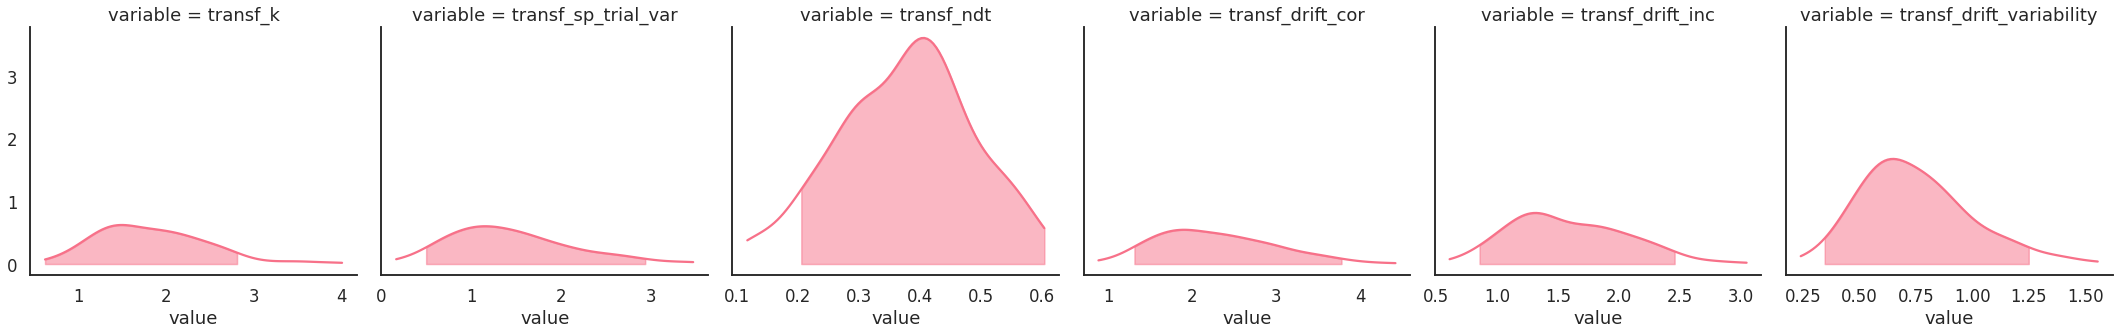

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

### Ungrouped

In [12]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.693165  1.902963  1.487277  1.183152  1.298121  1.648833   
2         1.454376  1.296875  1.288511  1.521330  1.284421  1.398700   
3         1.310099  1.550863  1.455303  1.799894  1.506182  1.586193   
4         1.301761  1.658232  1.583796  1.586956  1.638872  1.633680   
5         1.508389  1.701388  1.649837  1.504857  1.700781  1.371294   
...            ...       ...       ...       ...       ...       ...   
96        1.394518  1.281766  1.204888  1.265453  1.512276  1.531050   
97        1.814250  1.491318  1.660379  1.135034  1.718851  1.459324   
98        1.706058  1.546548  1.586624  1.614529  1.275392  1.962393   
99        1.785258  1.459177  1.776970  1.651715  1.685184  1.419596   
100       1.359884  1.606504  1.473639  1.535191  1.346491  1.639143   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         1.252733  1.579188  1.639454  1.325097  ...      1.0  0.0  0.0  1.0   
2         1.523004  1.724085  1.428141  1.513045  ...      0.0  1.0  1.0  1.0   
3         1.346588  1.547969  1.438542  1.702133  ...      1.0  1.0  1.0  1.0   
4         1.462750  1.674229  1.408486  1.591842  ...      1.0  0.0  0.0  0.0   
5         1.685847  1.598446  1.404466  1.708828  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.514394  1.750419  1.229132  1.205551  ...      1.0  1.0  1.0  1.0   
97        1.492663  1.497887  1.569534  1.202619  ...      1.0  1.0  0.0  1.0   
98        1.287594  1.465445  1.642311  1.722285  ...      1.0  1.0  1.0  1.0   
99        1.470481  1.434782  1.363967  1.437656  ...      1.0  0.0  0.0  1.0   
100       1.384854  1.371414  1.649957  1.632702  ...      1.0  1.0  1.0  1.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  0.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  0.0  1.0  1.0  
98        1.0  1.0  0.0  1.0  1.0  0.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 478 columns]

In [13]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.815900,1.506881,0.090940,1.465163,1.516061,1.569249,1.681783,1.809532,1.202057,1.320569,1.471750,1.615649,1.821377
2,0.974895,1.524620,-0.088865,1.646729,1.656079,1.687289,1.719758,1.731679,1.311520,1.411978,1.526479,1.617892,1.717321
3,0.899582,1.500411,0.101180,1.522173,1.543227,1.574857,1.598814,1.722459,1.266971,1.371277,1.493742,1.571779,1.735415
4,0.907950,1.542380,0.077783,1.578516,1.674281,1.702402,1.721476,1.778359,1.271154,1.382164,1.527199,1.646209,1.783636
5,1.000000,1.510223,0.282133,NaN,NaN,NaN,NaN,NaN,1.359764,1.420596,1.488938,1.583493,1.674560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.903766,1.483504,-0.049382,1.518616,1.554548,1.590052,1.639551,1.679960,1.235786,1.343565,1.449838,1.597214,1.721766
97,0.945607,1.481258,-0.044627,1.506861,1.560533,1.620913,1.687283,1.775614,1.159605,1.331281,1.477233,1.626482,1.776323
98,0.861925,1.528642,-0.016929,1.438256,1.501325,1.580577,1.659805,1.737549,1.142393,1.327456,1.525686,1.702791,1.893376


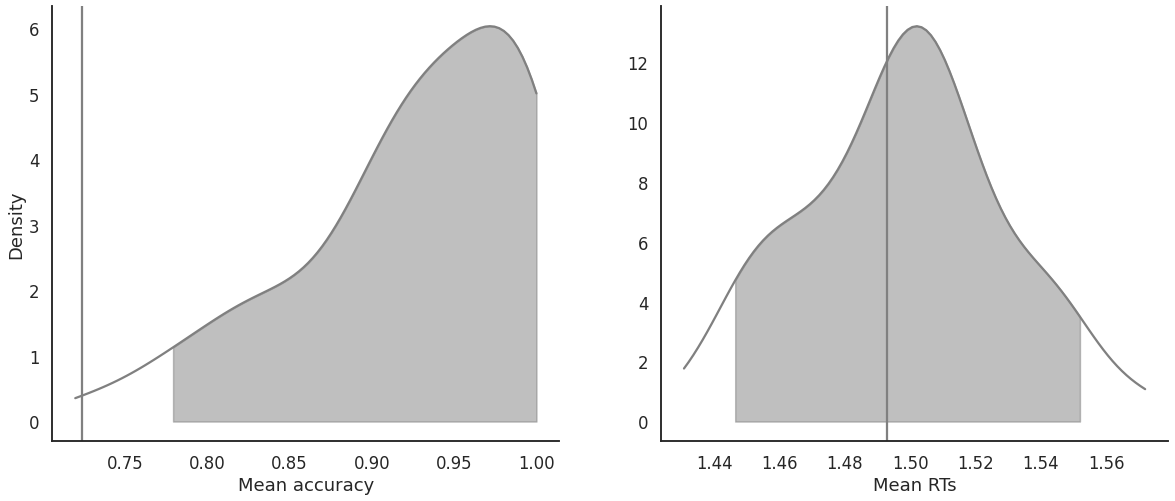

In [14]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

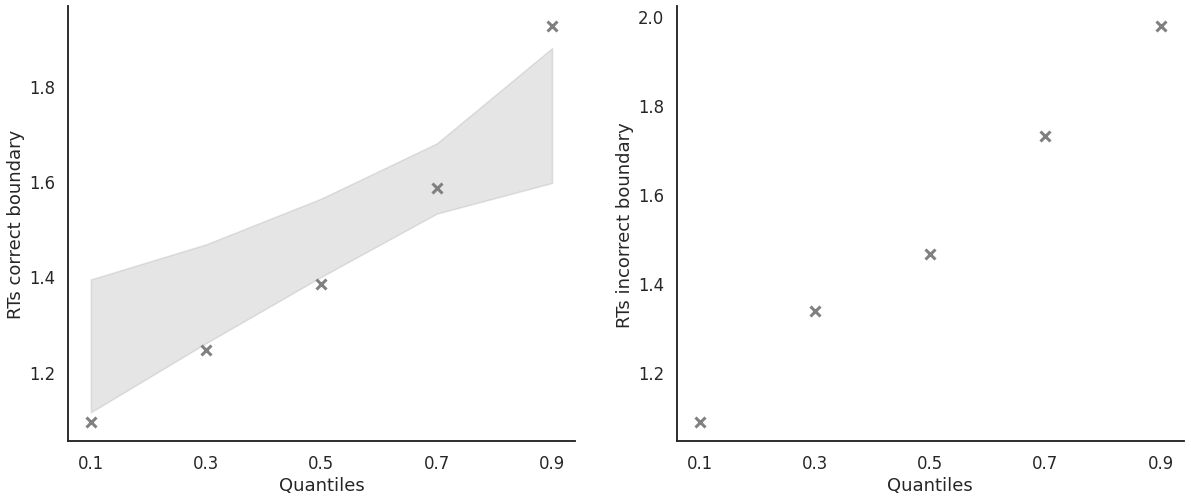

In [15]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [16]:
import numpy as np

In [17]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.80  1.534562 -0.186347   
                        2                1.00  1.528863  0.283451   
                        3                0.85  1.577855 -0.115510   
                        4                0.90  1.623910 -0.246256   
                        5                1.00  1.525588 -0.024913   
...                                       ...       ...       ...   
3           CD          96               0.95  1.507860  0.358764   
                        97               0.95  1.581117 -0.560141   
                        98               0.90  1.474218  0.237693   
                        99               0.90  1.581566 -0.484731   
                        100              1.00  1.471428  0.444475   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.728193             1.319202   
                        2                         NaN             1.490206   
                        3                    1.549813             1.490936   
                        4                    1.649095             1.511793   
                        5                         NaN             1.452423   
...                                               ...                  ...   
3           CD          96                   1.747676             1.428625   
                        97                   1.528396             1.543824   
                        98                   1.576321             1.338095   
                        99                   1.651426             1.496155   
                        100                       NaN             1.409952   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.758502             1.508531   
                        2                         NaN             1.536145   
                        3                    1.550730             1.574247   
                        4                    1.676528             1.587238   
                        5                         NaN             1.525061   
...                                               ...                  ...   
3           CD          96                   1.747676             1.478917   
                        97                   1.528396             1.570441   
                        98                   1.625512             1.440581   
                        99                   1.681999             1.585303   
                        100                       NaN             1.430162   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    1.772696             1.610643  
                        2                         NaN             1.557814  
                        3                    1.628157             1.654209  
                        4                    1.703960             1.749424  
                        5                         NaN             1.606272  
...                                               ...                  ...  
3           CD          96                   1.747676             1.559225  
                        97                   1.528396             1.719674  
                        98                   1.674702             1.577617  
                        99                   1.712573             1.681528  
                        100                       NaN             1.538831  

[1200 rows x 9 columns]

In [19]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.866667  1.538936 -0.080940               1.726778   
           2            1.000000  1.479032  0.309335                    NaN   
           3            0.933333  1.484095 -0.054575               1.570224   
           4            0.966667  1.511202  0.413283               1.593129   
           5            1.000000  1.542602  0.006582                    NaN   
...                          ...       ...       ...                    ...   
8          96           1.000000  1.514466 -0.276282                    NaN   
           97           0.896552  1.526485 -0.374503               1.512730   
           98           0.896552  1.450706  0.428468               1.525831   
           99           0.931034  1.611712 -0.389879               1.622358   
           100          1.000000  1.505358 -0.078567                    NaN   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.332940               1.777266   
           2                  1.349146                    NaN   
           3                  1.334003               1.601713   
           4                  1.355346               1.593129   
           5                  1.446807                    NaN   
...                                ...                    ...   
8          96                 1.483921                    NaN   
           97                 1.406130               1.513389   
           98                 1.237706               1.529278   
           99                 1.547153               1.627996   
           100                1.441680                    NaN   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.503743               1.809169   
           2                  1.424252                    NaN   
           3                  1.513079               1.633202   
           4                  1.463328               1.593129   
           5                  1.544260                    NaN   
...                                ...                    ...   
8          96                 1.513852                    NaN   
           97                 1.528486               1.538217   
           98                 1.349474               1.581125   
           99                 1.626622               1.633633   
           100                1.515855                    NaN   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.708005  
           2                  1.620771  
           3                  1.564252  
           4                  1.589374  
           5                  1.630757  
...                                ...  
8          96                 1.558092  
           97                 1.729295  
           98                 1.585942  
           99                 1.696974  
           100                1.553035  

[800 rows x 9 columns]

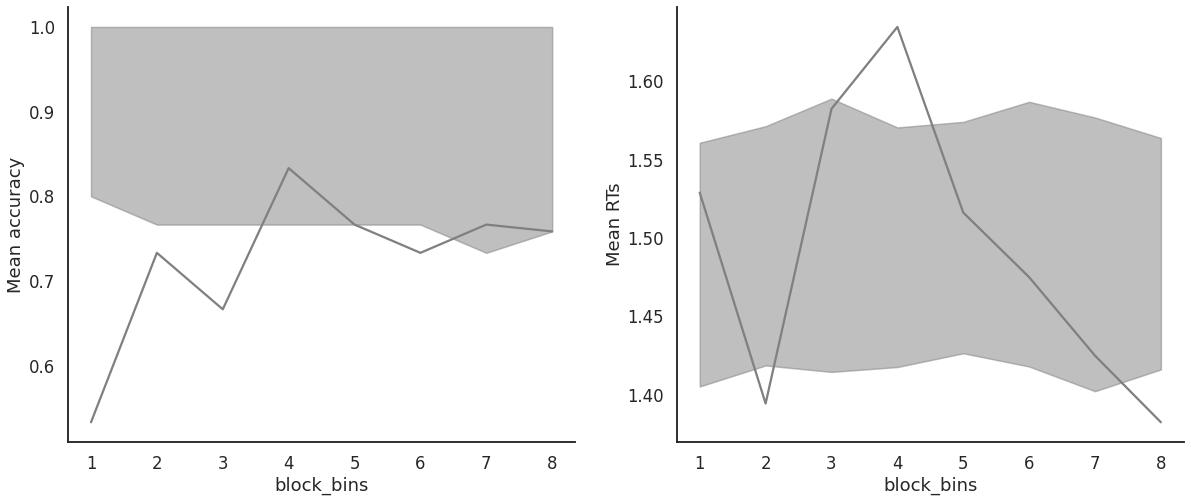

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

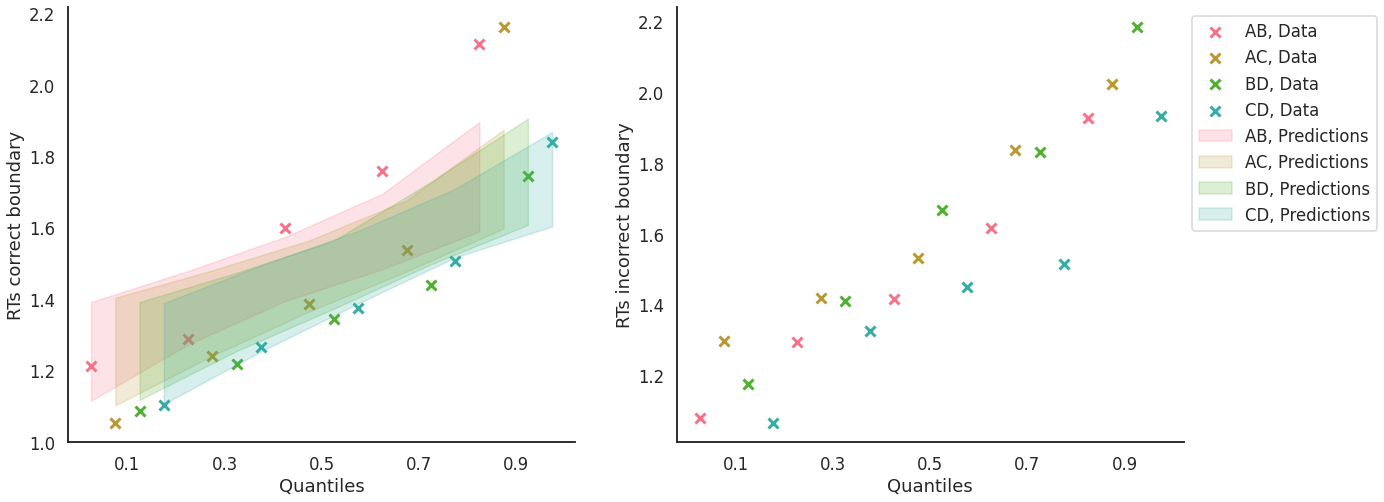

In [21]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);